In [118]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load data

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(20, 10)

In [6]:
df = pd.read_csv("survey_results_public.csv")

/home/khuyen/Data-science/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.FormalEducation = df.FormalEducation.map(
    {
        "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s degree",
        "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master’s degree",
        "Some college/university study without earning a degree": "Some college/university, no degree",
        "Associate degree": "Associate degree",
        "Other doctoral degree (Ph.D, Ed.D., etc.)": "Doctoral degree",
        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
        "Professional degree (JD, MD, etc.)": "Professional degree",
        "Primary/elementary school": "Primary/elementary school",
        "I never completed any formal education": "no formal education",
    }
)

In [8]:
companySize_to_interval = {
    "Fewer than 10 employees": pd.Interval(0, 10),
    "10 to 19 employees": pd.Interval(10, 19),
    "20 to 99 employees": pd.Interval(20, 99),
    "100 to 499 employees": pd.Interval(100, 499),
    "500 to 999 employees": pd.Interval(500, 999),
    "1,000 to 4,999 employees": pd.Interval(1000, 4999),
    "5,000 to 9,999 employees": pd.Interval(5000, 9999),
    "10,000 or more employees": pd.Interval(10000, float("inf")),
}

df.CompanySize = df.CompanySize.map(companySize_to_interval)

In [9]:
df.LastNewJob = df.LastNewJob.map(
    {
        "I've never had a job": pd.Interval(0, 0),
        "Less than a year ago": pd.Interval(0, 1),
        "Between 1 and 2 years ago": pd.Interval(1, 2),
        "Between 2 and 4 years ago": pd.Interval(2, 4),
        "More than 4 years ago": pd.Interval(4, 5),
    }
)

# Wake Time

In [11]:
ordered_waketime = [
    "Before 5:00 AM",
    "Between 5:00 - 6:00 AM",
    "Between 6:01 - 7:00 AM",
    "Between 7:01 - 8:00 AM",
    "Between 8:01 - 9:00 AM",
    "Between 9:01 - 10:00 AM",
    "Between 10:01 - 11:00 AM",
    "Between 11:01 AM - 12:00 PM",
    "After 12:01 PM",
    "I work night shifts",
    "I do not have a set schedule",
]

df.WakeTime = df.WakeTime.astype("category")
df.WakeTime.cat.set_categories(ordered_waketime, ordered=True, inplace=True)
sort_by_waketime = df.dropna(subset=["WakeTime"]).sort_values(by="WakeTime")

/home/khuyen/Data-science/venv/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


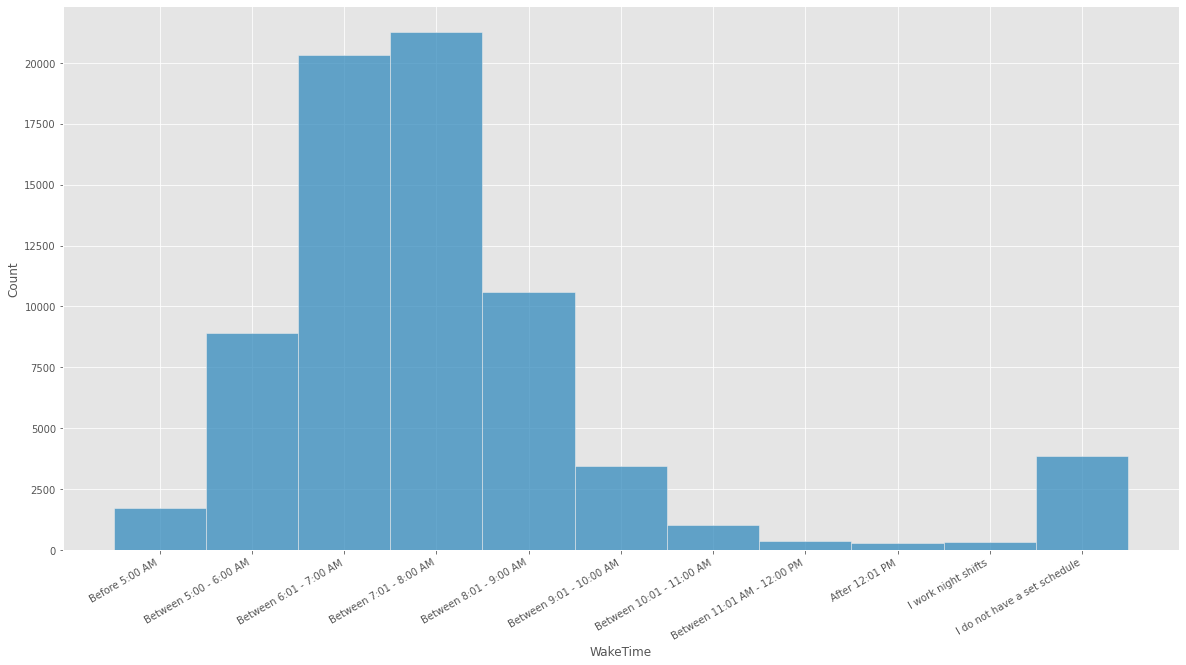

<IPython.core.display.Javascript object>

In [434]:
sns.histplot(data=sort_by_waketime, x="WakeTime")
plt.xticks(rotation=30, ha="right")
plt.show()

# Hours on Computer Per Day

In [12]:
ordered_hours_computer = [
    "Less than 1 hour",
    "1 - 4 hours",
    "5 - 8 hours",
    "9 - 12 hours",
    "Over 12 hours",
]

df.HoursComputer = df.HoursComputer.astype("category")
df.HoursComputer.cat.set_categories(ordered_hours_computer, ordered=True, inplace=True)
sort_by_hours_computer = df.dropna(subset=["HoursComputer"]).sort_values(
    by="HoursComputer"
)

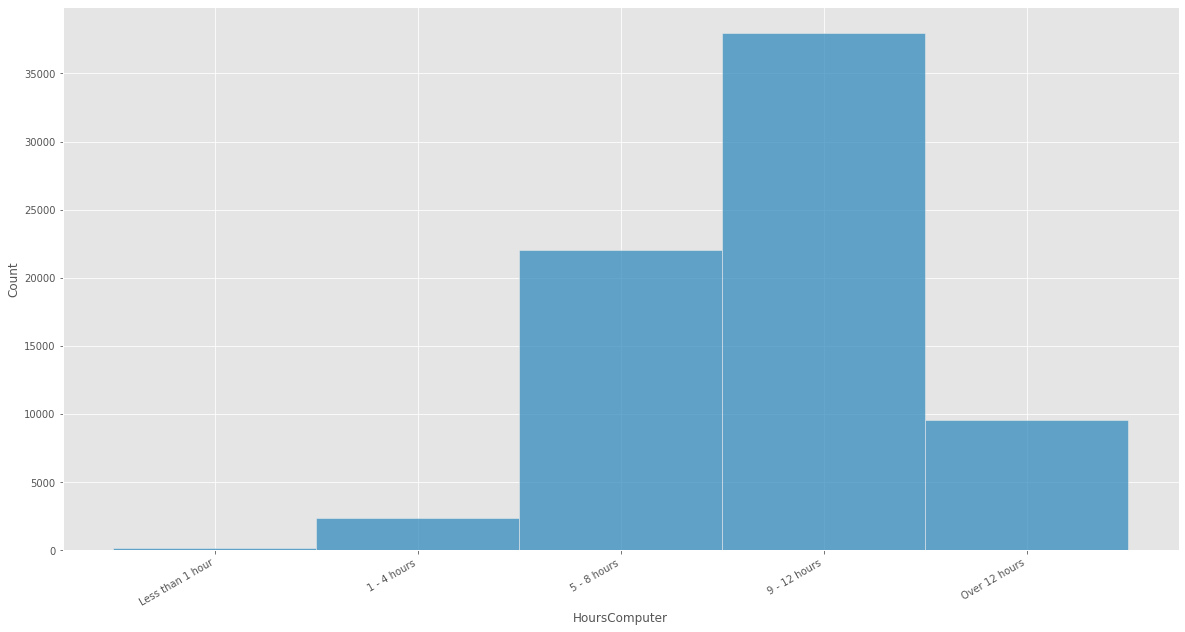

<IPython.core.display.Javascript object>

In [436]:
sns.histplot(data=sort_by_hours_computer, x="HoursComputer")
plt.xticks(rotation=30, ha="right")
plt.show()

# Operating System

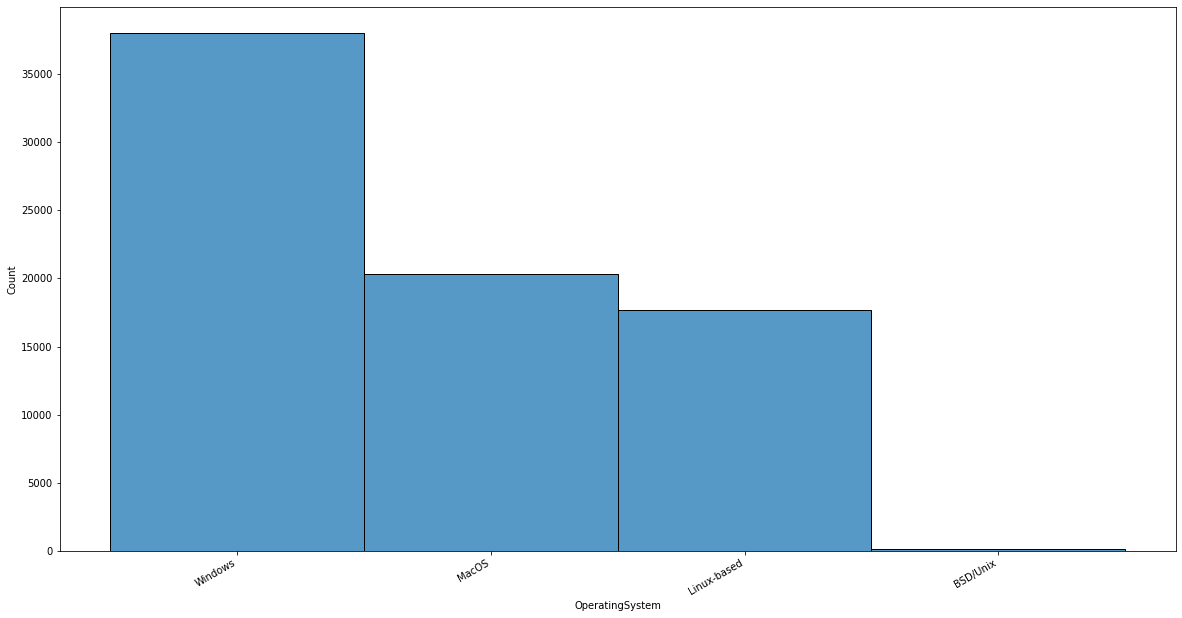

In [13]:
sns.histplot(
    data=df.sort_values(by="OperatingSystem", ascending=False), x="OperatingSystem"
)
plt.xticks(rotation=30, ha="right")
plt.show()

# IDE

In [14]:
df.IDE = df.IDE.apply(lambda row: row.split(";") if isinstance(row, str) else row)

In [15]:
ide = df.explode("IDE").groupby("IDE").agg({"Respondent": "count"}).reset_index()

In [16]:
ide.sort_values(by="Respondent", ascending=False)

,IDE,Respondent
19,Visual Studio Code,26280
18,Visual Studio,25870
10,Notepad++,25755
15,Sublime Text,21810
17,Vim,19477
6,IntelliJ,18765
0,Android Studio,14558
3,Eclipse,14213
1,Atom,13576
12,PyCharm,9027


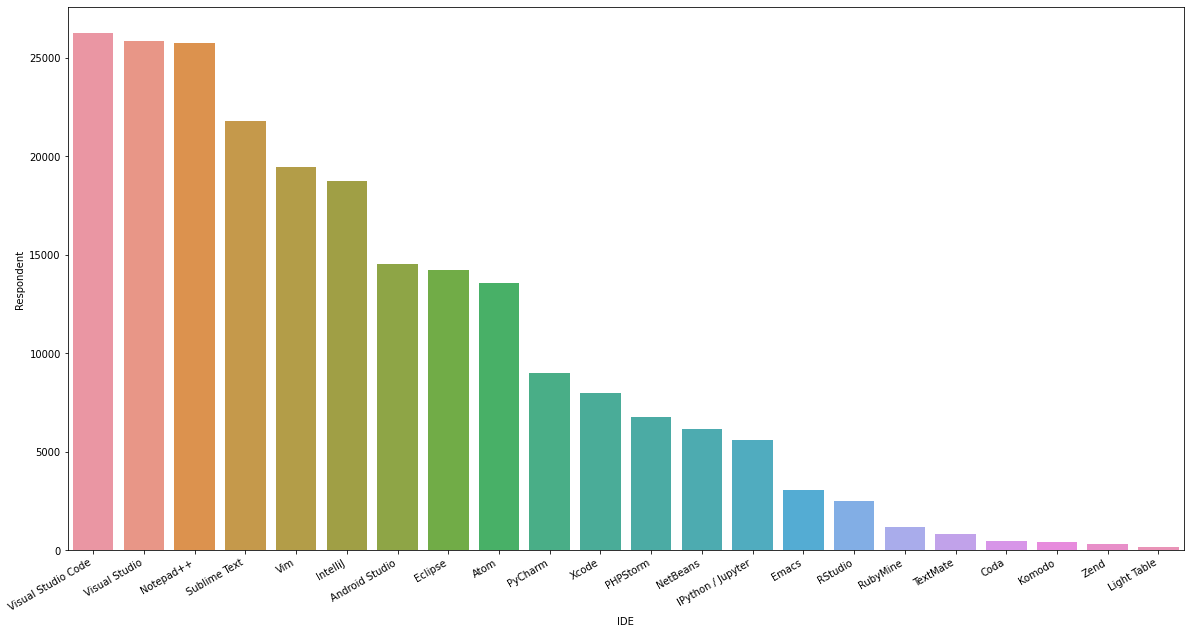

In [17]:
sns.barplot(
    data=ide.sort_values(by="Respondent", ascending=False), x="IDE", y="Respondent"
)
plt.xticks(rotation=30, ha="right")
plt.show()

# Hobby and Open Source

In [19]:
def create_group_df(df: pd.DataFrame, col1: str, col2: str):
    return df.groupby(by=[col1, col2]).agg({"Respondent": "count"}).reset_index()

In [22]:
group = create_group_df(df, 'Hobby', 'OpenSource')